In [ ]:
from pathlib import Path
import pandas as pd
import trimesh
import random
import sys

sys.path.append(str(Path("..").resolve()))
from src import *

# Regenerate the UV Maps

##### ℹ️ This notebook requires ShapeNetCore models in the `.shapenet/` root folder. It also requires the `statistics.parquet`.

The dataset produced so far in `data/dataset` is quite poor. The UV maps often lack interesting patterns that may help ControlNet to guide the diffusion process.

In this notebook we ask if we can regenerate the UV Maps using Blender _Smart UV Project_ function, while preserving the effective texture mapping.

In [2]:
dataset = ShapeNetCoreDataset3D()
stats = dataset.statistics
uids = stats[(stats["valid"])].index

In [ ]:
UID = uids[random.randint(0, len(uids) - 1)]
obj = ShapeNetCoreObject3D(UID, dataset.paths[UID])
trimesh.load(obj.path).show()

 74%|███████▎  | 25/34 [00:00<00:00, 222.35it/s]

100%|██████████| 34/34 [00:00<00:00, 196.29it/s]


OBJ import of 'model_normalized.obj' took 6.54 ms


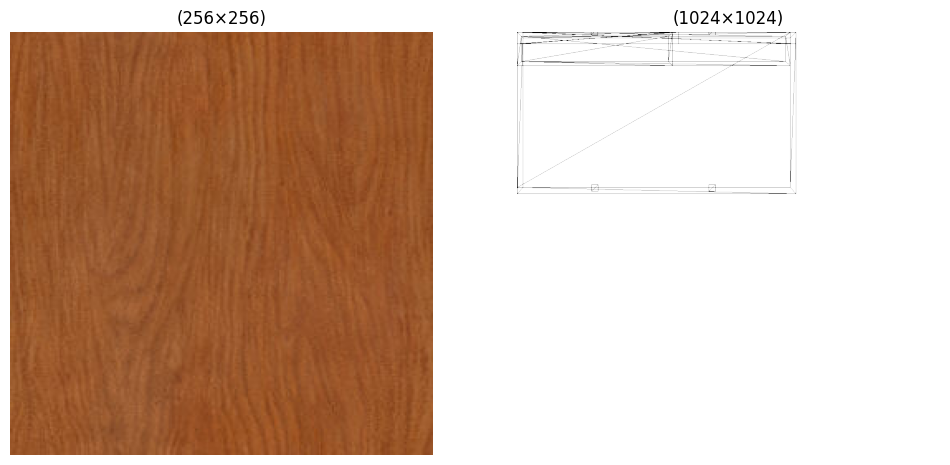

In [ ]:
tex, uv = obj.textures[0], obj.draw_uv_map()
plot_images([tex, uv], cols=2, size=5)

Fra:1 Mem:72.38M (Peak 72.62M) | Time:485246:33:03.13 | Mem:0.00M, Peak:0.00M | Scene | Synchronizing object | model_normalized
Fra:1 Mem:72.40M (Peak 72.62M) | Time:485246:33:03.13 | Mem:0.00M, Peak:0.00M | Scene | Initializing
Fra:1 Mem:72.40M (Peak 72.62M) | Time:485246:33:03.13 | Mem:0.00M, Peak:0.00M | Scene | Updating Images | Loading BakedTexture.001
Fra:1 Mem:72.40M (Peak 72.62M) | Time:485246:33:03.13 | Mem:0.00M, Peak:0.00M | Scene | Updating Images | Loading BakedTexture
Info: No active image found in material "material_1_0" (1) for object "model_normalized"
Info: No active image found in material "material_1_24" (2) for object "model_normalized"
Info: Baking map saved to internal image, save it externally or pack it


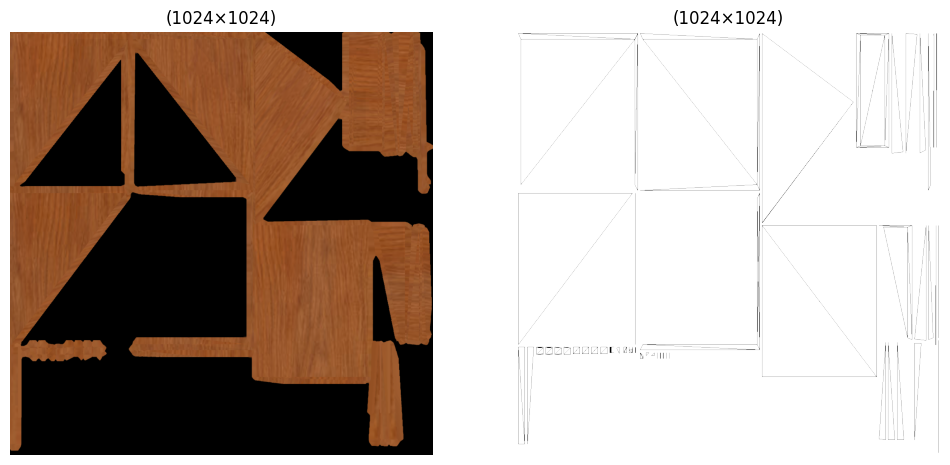

In [ ]:
new_tex, new_uv = obj.regenerate_uv_map(island_margin=0.01)
plot_images([new_tex, new_uv], cols=2, size=5)